### 이상치 데이터
* 이상치
    - IQR의 1.5배 또는 3배의 차이가 나면 이상치라고 표현한다
    - 다른 데이터보다 아주 작거나 큰 값을 말한다
    - 데이터를 분석할 때 이상치는 의사결정에 영향을 미칠 수 있다.
* 이상치 처리
    1. 제거
        - 오타, 오류, 비상식적 값들은 단순히 제거한다
    2. 치환
        - 평균, 최빈값, 중앙값(중위수)
* 이상치 구하기
    - 1/4 분위값 25%, 2/4 분위값 중앙값(median), 3/4 분위값 75%
    - IQR = Q3(3사분위) - Q1(1사분위)
    - 최대 이상치 = Q3(3사분위) + IQR * 1.5(3.0)
    - 최저 이상치 = Q1(1사분위) - IQR * 1.5(3.0)
---

<img src="../images/4분위수.png" width="300" height="300" />
<hr>

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv('../data_set/2.데이터 클린징/food.csv')
df.head()

,food_a,food_b,food_c
0,20,5,5
1,21,6,5
2,23,11,5
3,22,13,12
4,26,15,10


In [6]:
df.mean()

food_a    47.407407
food_b    51.037037
food_c    42.407407
dtype: float64

#### describe() 메서드란?
* 는 pandas DataFrame 또는 Series의 요약 통계량을 제공하는 매우 유용한 다* .
이 메서드는 DataFrame 또는 Series의 각 열에 대해 다음과 같은 정보를
    - 다:
count: 데이
    -  개수
mean
    -  평균값
std
    -  표준편차
m
    - n: 최소값
25
    - : 1사분위수
    - 50%: 중앙값

    - 5%: 3사분위수
max: 최대값

In [8]:
df.describe() # 기초 통계값을 알려준다. std : 표준편차, 25%:Q1, 50%:중앙값(median), 75%:Q3

,food_a,food_b,food_c
count,27.000000,27.000000,27.000000
mean,47.407407,51.037037,42.407407
std,20.267935,110.789295,64.268822
min,20.000000,5.000000,5.000000
25%,38.000000,20.000000,20.000000
50%,46.000000,30.000000,31.000000
75%,57.000000,41.500000,45.500000
max,120.000000,600.000000,350.000000


In [10]:
import numpy as np
test_median = [1,2,3,4,5,6,7,8,9,10];
print('평균 : ', np.mean(test_median))
print('중위수(중앙값) : ', np.median(test_median))

평균 :  5.5
중위수(중앙값) :  5.5


In [11]:
a_m = np.median(df['food_a'])
b_m = np.median(df['food_b'])
c_m = np.median(df['food_c'])

print('a : ', a_m)
print('b : ', b_m)
print('c : ', c_m)

a :  46.0
b :  30.0
c :  31.0


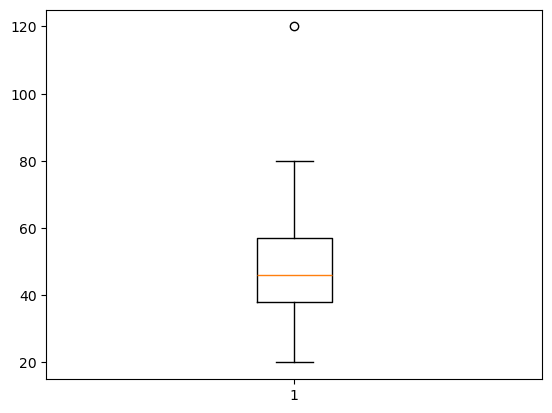

In [13]:
import matplotlib.pyplot as plt # matplotlib를 사용하여 상자 수염 그림(boxplot)을 그리는 코드
plt.boxplot(df['food_a'])
plt.show()
# o : 이상치
# Q1 : 20
# median : 주황선
# Q3 : 80
# IQR = 80-20 = 60 = Q3 - Q1

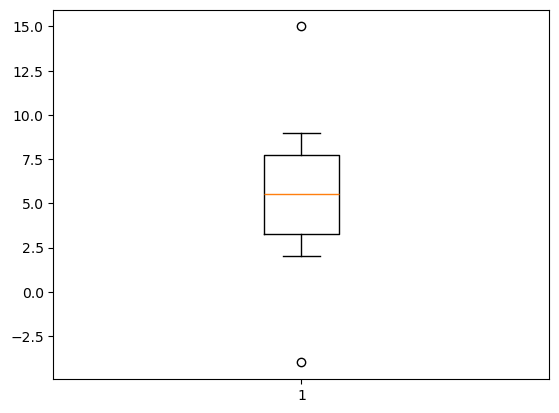

In [14]:
test_median = [-4,2,3,4,5,6,7,8,9,15]
df_test = pd.DataFrame(test_median)
plt.boxplot(df_test[0])
plt.show()

In [16]:
df_test.describe()

,0
count,10.000000
mean,5.500000
std,4.972145
min,-4.000000
25%,3.250000
50%,5.500000
75%,7.750000
max,15.000000


In [18]:
df_test.describe().loc['25%'] # Q1 = 3.25

0    3.25
Name: 25%, dtype: float64

In [19]:
df_test.describe().loc['75%'] # Q1 = 7.75

0    7.75
Name: 75%, dtype: float64

In [22]:
q1 = df_test.describe().loc['25%'] 
q3 = df_test.describe().loc['75%'] 

q1, q3

(0    3.25
 Name: 25%, dtype: float64,
 0    7.75
 Name: 75%, dtype: float64)

In [23]:
iqr = q3 - q1
lower = q1 - iqr*1.5
upper = q3 + iqr*1.5

iqr, lower, upper

(0    4.5
 dtype: float64,
 0   -3.5
 dtype: float64,
 0    14.5
 dtype: float64)

In [24]:
df_test

,0
0,-4
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,15


In [33]:
 df_test[(df_test >= lower) & (df_test <= upper)]

,0
0,NaN
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0
6,7.0
7,8.0
8,9.0
9,NaN


In [35]:
df_test.describe()

,0
count,8.00000
mean,5.50000
std,2.44949
min,2.00000
25%,3.75000
50%,5.50000
75%,7.25000
max,9.00000


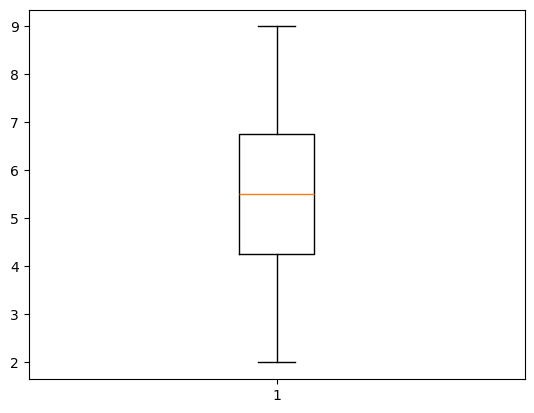

In [38]:
df_test = df_test[(df_test >= lower) & (df_test <= upper)]
#plt.boxplot(df_test) 
#plt.show()
# NaN 값이 포함되어 있으면 이러한 통계량을 계산할 수 없기 때문에 그래프가 제대로 그려지지 않습니다.
# 따라서 NaN 값을 처리하는 것이 중요합니다. 일반적으로 다음과 같은 방법으로 NaN 값을 처리할 수 있습니다:
# 1. NaN 값 제거: df.dropna(inplace=True) 를 통해 NaN 값이 포함된 행을 삭제할 수 있습니다.
# 2. NaN 값 대체: df.fillna(value=0, inplace=True) 와 같이 NaN 값을 특정 값으로 대체할 수 있습니다.
# 3. 중앙값으로 대체: df['column'].fillna(df['column'].median(), inplace=True) 와 같이 해당 열의 중앙값으로 NaN 값을 대체할 수 있습니다.
df_test.replace(to_replace = np.nan, value=df_test.describe().loc['50%'], inplace=True)
df_test
plt.boxplot(df_test)
plt.show()